In [9]:
import pandas as pd
data = pd.read_csv("Bitcoin Historical Data daily.csv")
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,03/24/2024,"67,211.9","64,036.5","67,587.8","63,812.9",65.59K,4.96%
1,03/23/2024,"64,037.8","63,785.6","65,972.4","63,074.9",35.11K,0.40%
2,03/22/2024,"63,785.5","65,501.5","66,633.3","62,328.3",72.43K,-2.62%
3,03/21/2024,"65,503.8","67,860.0","68,161.7","64,616.1",75.26K,-3.46%
4,03/20/2024,"67,854.0","62,046.8","68,029.5","60,850.9",133.53K,9.35%


In [10]:
# Data Understanding

In [11]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,4999,4999,4999,4999,4999,4993,4999
unique,4999,4044,4037,4032,4041,4423,1550
top,03/24/2024,0.1,0.1,0.1,0.1,1.05M,0.00%
freq,1,100,100,97,101,6,429


In [12]:
print(data.dtypes)

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


In [13]:
# Data Cleaning
# 1. Missing Values
# 2. Verfiy Data Types
# 3. Handling inconsistencies

In [14]:
missing_values = data.isnull().sum()
print(missing_values)


Date        0
Price       0
Open        0
High        0
Low         0
Vol.        6
Change %    0
dtype: int64


In [15]:
data['Date'] = pd.to_datetime(data['Date'],format = '%m/%d/%Y')
print(data)

           Date     Price      Open      High       Low     Vol. Change %
0    2024-03-24  67,211.9  64,036.5  67,587.8  63,812.9   65.59K    4.96%
1    2024-03-23  64,037.8  63,785.6  65,972.4  63,074.9   35.11K    0.40%
2    2024-03-22  63,785.5  65,501.5  66,633.3  62,328.3   72.43K   -2.62%
3    2024-03-21  65,503.8  67,860.0  68,161.7  64,616.1   75.26K   -3.46%
4    2024-03-20  67,854.0  62,046.8  68,029.5  60,850.9  133.53K    9.35%
...         ...       ...       ...       ...       ...      ...      ...
4994 2010-07-22       0.1       0.1       0.1       0.1    2.16K    0.00%
4995 2010-07-21       0.1       0.1       0.1       0.1    0.58K    0.00%
4996 2010-07-20       0.1       0.1       0.1       0.1    0.26K    0.00%
4997 2010-07-19       0.1       0.1       0.1       0.1    0.57K    0.00%
4998 2010-07-18       0.1       0.0       0.1       0.1    0.08K    0.00%

[4999 rows x 7 columns]


In [16]:
missing_values = data.isnull().sum()
print(missing_values)

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        6
Change %    0
dtype: int64


In [17]:
print(data.dtypes)

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
dtype: object


In [18]:
cols_to_clean = ['Price', 'Open', 'High', 'Low']
data[cols_to_clean] = data[cols_to_clean].replace(',', '', regex=True)


In [19]:
data[cols_to_clean] = data[cols_to_clean].apply(pd.to_numeric, errors='coerce')


In [20]:
missing_values = data.isnull().sum()
print(missing_values)


Date        0
Price       0
Open        0
High        0
Low         0
Vol.        6
Change %    0
dtype: int64


In [21]:
data['Vol.'] = data['Vol.'].fillna('0')


In [22]:
data['Vol.']= data['Vol.'].replace({'K':'*1e3', 'M': '*1e6', 'B': '1e9'},regex = True).map(pd.eval)                                 

In [23]:
data['Vol.'] = pd.to_numeric(data['Vol.'])

In [24]:
missing_values = data.isnull().sum()
print(missing_values)

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [25]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-03-24,67211.9,64036.5,67587.8,63812.9,65590.0,4.96%
1,2024-03-23,64037.8,63785.6,65972.4,63074.9,35110.0,0.40%
2,2024-03-22,63785.5,65501.5,66633.3,62328.3,72430.0,-2.62%
3,2024-03-21,65503.8,67860.0,68161.7,64616.1,75260.0,-3.46%
4,2024-03-20,67854.0,62046.8,68029.5,60850.9,133530.0,9.35%


In [26]:
numerical_summary = data.select_dtypes([float,int]).describe()
print(numerical_summary)

              Price          Open          High           Low          Vol.
count   4999.000000   4999.000000   4999.000000   4999.000000  4.999000e+03
mean   10812.283337  10798.901840  11067.453051  10511.891198  1.236520e+07
std    15892.032468  15872.785452  16270.707594  15444.928771  1.549402e+08
min        0.100000      0.000000      0.100000      0.000000  0.000000e+00
25%      226.700000    226.450000    231.400000    221.950000  3.171000e+04
50%     1975.100000   1962.000000   2048.400000   1875.300000  6.870000e+04
75%    15450.150000  15372.150000  15954.550000  14557.200000  1.850650e+05
max    73066.300000  73066.700000  73740.900000  71338.400000  4.471000e+09


In [27]:
print(data.dtypes)

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.               float64
Change %            object
dtype: object


In [28]:
data['Change %']= data['Change %'].str.rstrip('%').astype(float)

In [29]:
missing_values = data.isnull().sum()
print(missing_values)

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [30]:
zero_counts = (data == 0).sum()
print("Columns with zero values:")
print(zero_counts[zero_counts > 0])


Columns with zero values:
Open          1
Low           2
Vol.          6
Change %    429
dtype: int64


In [31]:
# Inspect rows with zeroes in specific columns
print(data[data['Open'] == 0])
print(data[data['Low'] == 0])
print(data[data['Vol.'] == 0])
print(data[data['Change %'] == 0])


           Date  Price  Open  High  Low  Vol.  Change %
4998 2010-07-18    0.1   0.0   0.1  0.1  80.0       0.0
           Date  Price  Open  High  Low      Vol.  Change %
4916 2010-10-08    0.1   0.1   0.1  0.0  139290.0       0.0
4955 2010-08-30    0.1   0.1   0.1  0.0   34190.0       0.0
           Date  Price  Open  High   Low  Vol.  Change %
4656 2011-06-25   17.5  17.5  17.5  17.5   0.0       0.0
4657 2011-06-24   17.5  17.5  17.5  17.5   0.0       0.0
4658 2011-06-23   17.5  17.5  17.5  17.5   0.0       0.0
4659 2011-06-22   17.5  17.5  17.5  17.5   0.0       0.0
4660 2011-06-21   17.5  17.5  17.5  17.5   0.0       0.0
4661 2011-06-20   17.5  17.5  17.5  17.5   0.0       0.0
           Date    Price     Open     High      Low      Vol.  Change %
79   2024-01-05  44156.9  44163.0  44312.1  42629.0   68070.0       0.0
446  2023-01-03  16674.2  16673.1  16773.2  16607.2  178730.0       0.0
969  2021-07-29  40001.4  40009.0  40630.7  39340.8   75300.0       0.0
1564 2019-12-12   720

In [32]:
#Replace Zeros

In [33]:
data['Open']= data['Open'].replace(0,data['Open'].median())
data['Low'] = data['Low'].replace(0, data['Low'].median())
data['Vol.'] = data['Vol.'].replace(0,data['Vol.'].median())
data['Change %']=data['Change %'].replace(0,data['Change %'].median())


In [34]:
print(data[data['Open'] == 0])
print(data[data['Low'] == 0])
print(data[data['Vol.'] == 0])
print(data[data['Change %'] == 0])

Empty DataFrame
Columns: [Date, Price, Open, High, Low, Vol., Change %]
Index: []
Empty DataFrame
Columns: [Date, Price, Open, High, Low, Vol., Change %]
Index: []
Empty DataFrame
Columns: [Date, Price, Open, High, Low, Vol., Change %]
Index: []
           Date    Price     Open     High      Low      Vol.  Change %
79   2024-01-05  44156.9  44163.0  44312.1  42629.0   68070.0       0.0
446  2023-01-03  16674.2  16673.1  16773.2  16607.2  178730.0       0.0
969  2021-07-29  40001.4  40009.0  40630.7  39340.8   75300.0       0.0
1564 2019-12-12   7208.0   7208.0   7272.4   7124.6  611800.0       0.0
1699 2019-07-30   9580.7   9580.0   9703.0   9483.0  511510.0       0.0
...         ...      ...      ...      ...      ...       ...       ...
4994 2010-07-22      0.1      0.1      0.1      0.1    2160.0       0.0
4995 2010-07-21      0.1      0.1      0.1      0.1     580.0       0.0
4996 2010-07-20      0.1      0.1      0.1      0.1     260.0       0.0
4997 2010-07-19      0.1      0.1 

In [35]:
data['Change %'] = data['Change %'].replace(0, data['Change %'].median())


In [36]:
print(data[data['Change %'] == 0])


           Date    Price     Open     High      Low      Vol.  Change %
79   2024-01-05  44156.9  44163.0  44312.1  42629.0   68070.0       0.0
446  2023-01-03  16674.2  16673.1  16773.2  16607.2  178730.0       0.0
969  2021-07-29  40001.4  40009.0  40630.7  39340.8   75300.0       0.0
1564 2019-12-12   7208.0   7208.0   7272.4   7124.6  611800.0       0.0
1699 2019-07-30   9580.7   9580.0   9703.0   9483.0  511510.0       0.0
...         ...      ...      ...      ...      ...       ...       ...
4994 2010-07-22      0.1      0.1      0.1      0.1    2160.0       0.0
4995 2010-07-21      0.1      0.1      0.1      0.1     580.0       0.0
4996 2010-07-20      0.1      0.1      0.1      0.1     260.0       0.0
4997 2010-07-19      0.1      0.1      0.1      0.1     570.0       0.0
4998 2010-07-18      0.1   1962.0      0.1      0.1      80.0       0.0

[429 rows x 7 columns]


In [37]:
print(data[data['Change %'] == 0][['Date', 'Price', 'Change %']])


           Date    Price  Change %
79   2024-01-05  44156.9       0.0
446  2023-01-03  16674.2       0.0
969  2021-07-29  40001.4       0.0
1564 2019-12-12   7208.0       0.0
1699 2019-07-30   9580.7       0.0
...         ...      ...       ...
4994 2010-07-22      0.1       0.0
4995 2010-07-21      0.1       0.0
4996 2010-07-20      0.1       0.0
4997 2010-07-19      0.1       0.0
4998 2010-07-18      0.1       0.0

[429 rows x 3 columns]


In [38]:
data = data.sort_values(by='Date')


In [39]:
data['Change %'] = data['Price'].pct_change() * 100


In [40]:
# Correct way to fill missing values in 'Change %'
data['Change %'] = data['Change %'].fillna(0)



In [41]:
print(data[data['Change %'] == 0])

           Date   Price    Open    High     Low      Vol.  Change %
4998 2010-07-18     0.1  1962.0     0.1     0.1      80.0       0.0
4997 2010-07-19     0.1     0.1     0.1     0.1     570.0       0.0
4996 2010-07-20     0.1     0.1     0.1     0.1     260.0       0.0
4995 2010-07-21     0.1     0.1     0.1     0.1     580.0       0.0
4994 2010-07-22     0.1     0.1     0.1     0.1    2160.0       0.0
...         ...     ...     ...     ...     ...       ...       ...
3108 2015-09-20   231.1   231.1   232.7   229.9   33150.0       0.0
2733 2016-09-29   604.7   604.7   607.2   602.0   25320.0       0.0
2696 2016-11-05   702.1   702.1   706.4   694.0   22020.0       0.0
2646 2016-12-25   891.1   891.1   895.2   851.4   42480.0       0.0
1564 2019-12-12  7208.0  7208.0  7272.4  7124.6  611800.0       0.0

[401 rows x 7 columns]


In [42]:
# Inspect rows with Change % == 0.0
print(data[data['Change %'] == 0][['Date', 'Price', 'Open', 'High', 'Low', 'Change %']])


           Date   Price    Open    High     Low  Change %
4998 2010-07-18     0.1  1962.0     0.1     0.1       0.0
4997 2010-07-19     0.1     0.1     0.1     0.1       0.0
4996 2010-07-20     0.1     0.1     0.1     0.1       0.0
4995 2010-07-21     0.1     0.1     0.1     0.1       0.0
4994 2010-07-22     0.1     0.1     0.1     0.1       0.0
...         ...     ...     ...     ...     ...       ...
3108 2015-09-20   231.1   231.1   232.7   229.9       0.0
2733 2016-09-29   604.7   604.7   607.2   602.0       0.0
2696 2016-11-05   702.1   702.1   706.4   694.0       0.0
2646 2016-12-25   891.1   891.1   895.2   851.4       0.0
1564 2019-12-12  7208.0  7208.0  7272.4  7124.6       0.0

[401 rows x 6 columns]


In [43]:
# Remove rows with unrealistic Price values (e.g., placeholders)
data = data[data['Price'] > 0.1]


In [44]:
# Sort data by Date
data = data.sort_values(by='Date')

# Recalculate Change %
data['Change %'] = data['Price'].pct_change() * 100

# Fill missing values in Change %
data['Change %'] = data['Change %'].fillna(0)


In [45]:
# Replace remaining 0.0 values in Change % with median
data['Change %'] = data['Change %'].replace(0, data['Change %'].median())


In [46]:
# Check remaining rows with Change % == 0.0
print(data[data['Change %'] == 0])


           Date   Price    Open    High     Low      Vol.  Change %
4898 2010-10-26     0.2     0.1     0.2     0.1   19220.0       0.0
4897 2010-10-27     0.2     0.2     0.2     0.2   65610.0       0.0
4896 2010-10-28     0.2     0.2     0.2     0.2   21530.0       0.0
4895 2010-10-29     0.2     0.2     0.2     0.2   28690.0       0.0
4894 2010-10-30     0.2     0.2     0.2     0.2   26710.0       0.0
...         ...     ...     ...     ...     ...       ...       ...
3108 2015-09-20   231.1   231.1   232.7   229.9   33150.0       0.0
2733 2016-09-29   604.7   604.7   607.2   602.0   25320.0       0.0
2696 2016-11-05   702.1   702.1   706.4   694.0   22020.0       0.0
2646 2016-12-25   891.1   891.1   895.2   851.4   42480.0       0.0
1564 2019-12-12  7208.0  7208.0  7272.4  7124.6  611800.0       0.0

[302 rows x 7 columns]


In [47]:
print(data[data['Change %'] == 0][['Date', 'Price', 'Open', 'High', 'Low', 'Change %']])


           Date   Price    Open    High     Low  Change %
4898 2010-10-26     0.2     0.1     0.2     0.1       0.0
4897 2010-10-27     0.2     0.2     0.2     0.2       0.0
4896 2010-10-28     0.2     0.2     0.2     0.2       0.0
4895 2010-10-29     0.2     0.2     0.2     0.2       0.0
4894 2010-10-30     0.2     0.2     0.2     0.2       0.0
...         ...     ...     ...     ...     ...       ...
3108 2015-09-20   231.1   231.1   232.7   229.9       0.0
2733 2016-09-29   604.7   604.7   607.2   602.0       0.0
2696 2016-11-05   702.1   702.1   706.4   694.0       0.0
2646 2016-12-25   891.1   891.1   895.2   851.4       0.0
1564 2019-12-12  7208.0  7208.0  7272.4  7124.6       0.0

[302 rows x 6 columns]


In [48]:
# Sort data by Date
data = data.sort_values(by='Date')

# Recalculate Change %
data['Change %'] = data['Price'].pct_change() * 100

# Fill missing values in Change %
data['Change %'] = data['Change %'].fillna(0)


In [49]:
print(data[data['Change %'] == 0])


           Date   Price    Open    High     Low      Vol.  Change %
4898 2010-10-26     0.2     0.1     0.2     0.1   19220.0       0.0
4897 2010-10-27     0.2     0.2     0.2     0.2   65610.0       0.0
4896 2010-10-28     0.2     0.2     0.2     0.2   21530.0       0.0
4895 2010-10-29     0.2     0.2     0.2     0.2   28690.0       0.0
4894 2010-10-30     0.2     0.2     0.2     0.2   26710.0       0.0
...         ...     ...     ...     ...     ...       ...       ...
3108 2015-09-20   231.1   231.1   232.7   229.9   33150.0       0.0
2733 2016-09-29   604.7   604.7   607.2   602.0   25320.0       0.0
2696 2016-11-05   702.1   702.1   706.4   694.0   22020.0       0.0
2646 2016-12-25   891.1   891.1   895.2   851.4   42480.0       0.0
1564 2019-12-12  7208.0  7208.0  7272.4  7124.6  611800.0       0.0

[302 rows x 7 columns]


In [50]:
# Filter out rows with unrealistic Price values
data = data[data['Price'] > 0.5]  # Adjust the threshold as needed


In [51]:
# Replace remaining 0.0 values in Change % with median
data['Change %'] = data['Change %'].replace(0, data['Change %'].median())


In [52]:
print(data[data['Change %'] == 0])

Empty DataFrame
Columns: [Date, Price, Open, High, Low, Vol., Change %]
Index: []


In [53]:
print(data)

           Date    Price     Open     High      Low      Vol.   Change %
4800 2011-02-01      0.7      0.5      0.9      0.5   31560.0  40.000000
4799 2011-02-02      0.7      0.7      0.8      0.7    5630.0   0.042337
4798 2011-02-03      0.7      0.7      0.8      0.7    8530.0   0.042337
4797 2011-02-04      0.8      0.7      0.9      0.7   42220.0  14.285714
4796 2011-02-05      0.9      0.8      0.9      0.8   15790.0  12.500000
...         ...      ...      ...      ...      ...       ...        ...
4    2024-03-20  67854.0  62046.8  68029.5  60850.9  133530.0   9.353747
3    2024-03-21  65503.8  67860.0  68161.7  64616.1   75260.0  -3.463613
2    2024-03-22  63785.5  65501.5  66633.3  62328.3   72430.0  -2.623207
1    2024-03-23  64037.8  63785.6  65972.4  63074.9   35110.0   0.395544
0    2024-03-24  67211.9  64036.5  67587.8  63812.9   65590.0   4.956604

[4801 rows x 7 columns]


In [54]:
print(data.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [55]:
print(data.head())

           Date  Price  Open  High  Low     Vol.   Change %
4800 2011-02-01    0.7   0.5   0.9  0.5  31560.0  40.000000
4799 2011-02-02    0.7   0.7   0.8  0.7   5630.0   0.042337
4798 2011-02-03    0.7   0.7   0.8  0.7   8530.0   0.042337
4797 2011-02-04    0.8   0.7   0.9  0.7  42220.0  14.285714
4796 2011-02-05    0.9   0.8   0.9  0.8  15790.0  12.500000


In [56]:
print(data.tail())

        Date    Price     Open     High      Low      Vol.  Change %
4 2024-03-20  67854.0  62046.8  68029.5  60850.9  133530.0  9.353747
3 2024-03-21  65503.8  67860.0  68161.7  64616.1   75260.0 -3.463613
2 2024-03-22  63785.5  65501.5  66633.3  62328.3   72430.0 -2.623207
1 2024-03-23  64037.8  63785.6  65972.4  63074.9   35110.0  0.395544
0 2024-03-24  67211.9  64036.5  67587.8  63812.9   65590.0  4.956604


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

Correlation between Volume of Trading happened vs Price
           Vol.     Price
Vol.   1.000000  0.144022
Price  0.144022  1.000000


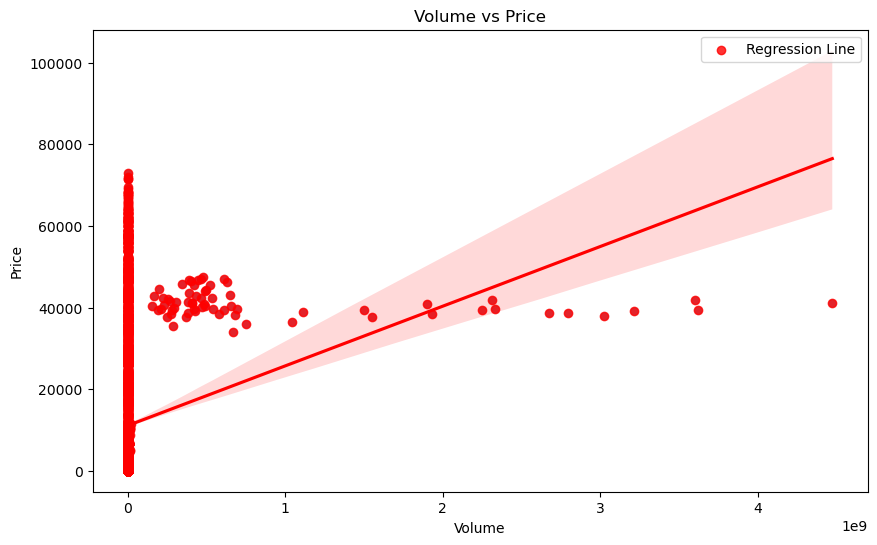

In [58]:
correlation = data[['Vol.','Price']].corr()
print("Correlation between Volume of Trading happened vs Price")
print(correlation)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Vol.',y='Price',data=data,alpha=0.6)
sns.regplot(x='Vol.',y='Price',data=data,color='red',label='Regression Line')
plt.title("Volume vs Price")
plt.xlabel('Volume')
plt.ylabel('Price')
plt.legend()
plt.show()






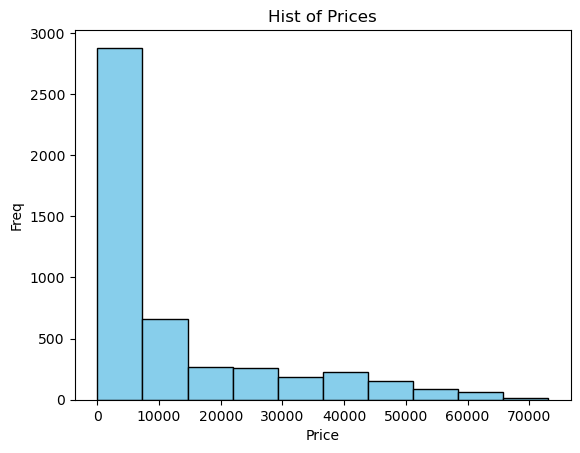

1.5794748978854591


In [59]:
plt.hist(data['Price'],bins=10,color='Skyblue',edgecolor='black')
plt.title("Hist of Prices")
plt.xlabel("Price")
plt.ylabel("Freq")
plt.show()
price_skewness = data['Price'].skew()
print(price_skewness)

In [60]:
price_min=data['Price'].min()
price_max=data['Price'].max()
print(price_min, price_max)

0.7 73066.3


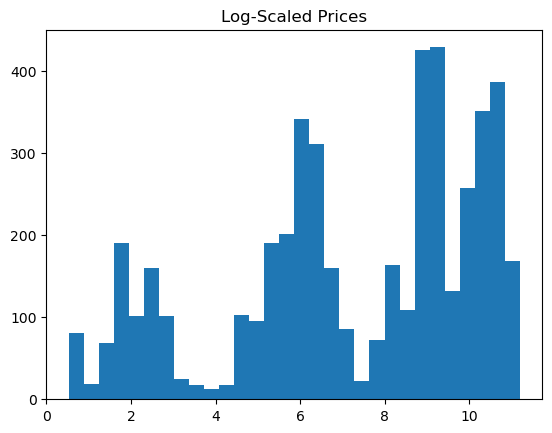

In [61]:
import numpy as np
data['Log_Volume'] = np.log1p(data['Vol.'])
data['Log_Price'] = np.log1p(data['Price'])

# Plot transformed data
plt.hist(data['Log_Price'], bins=30)
plt.title("Log-Scaled Prices")
plt.show()


In [62]:
log_min = data['Log_Price'].min()
log_max = data['Log_Price'].max()
print(f"Log-scaled range: {log_min} to {log_max}")
lVol_min =data['Log_Volume'].min()
lVol_max=data['Log_Volume'].max()
print(lVol_min , lVol_max)

Log-scaled range: 0.5306282510621704 to 11.199136213233533
5.564520407322694 22.220877934421917


Correlation between log transformed Volume and Price
            Log_Volume  Log_Price
Log_Volume    1.000000   0.433056
Log_Price     0.433056   1.000000


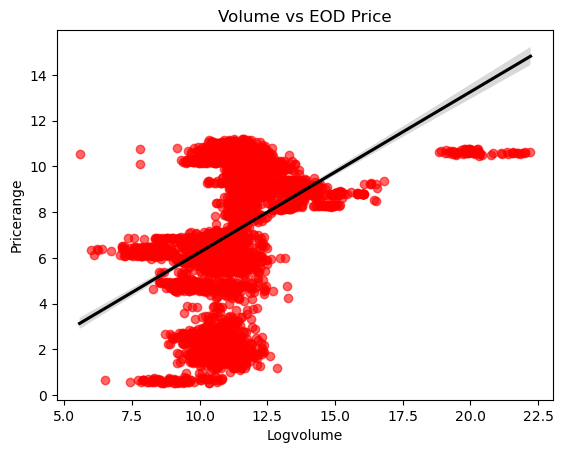

In [63]:
correlation1=data[['Log_Volume','Log_Price']].corr()
print("Correlation between log transformed Volume and Price")
print(correlation1)
plt.scatter(data['Log_Volume'],data['Log_Price'],color='red',alpha=0.6)
sns.regplot(x='Log_Volume',y='Log_Price',data=data,color='black',scatter=False,label='Regression Line')
plt.xlabel('Logvolume')
plt.ylabel('Pricerange')
plt.title('Volume vs EOD Price')
plt.show()

In [64]:
#Is there a threshold for Vol. beyond which significant changes in the Price occur?

In [65]:
Volume_bins = pd.qcut(data['Log_Volume'],q=4,labels=['LOW','Medium','HIGH','Very High'])
data['Volume_bins']=Volume_bins
price_summary = data[['Log_Volume','Log_Price']].describe()
print(price_summary)

        Log_Volume    Log_Price
count  4801.000000  4801.000000
mean     11.414147     7.232363
std       1.795691     2.907820
min       5.564520     0.530628
25%      10.478442     5.530619
50%      11.190390     8.151074
75%      12.195724     9.730966
max      22.220878    11.199136


C:\Users\sindhu\AppData\Local\Temp\ipykernel_25784\3016853108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Volume_bins',y='Log_Price',data=data,palette='Set2')


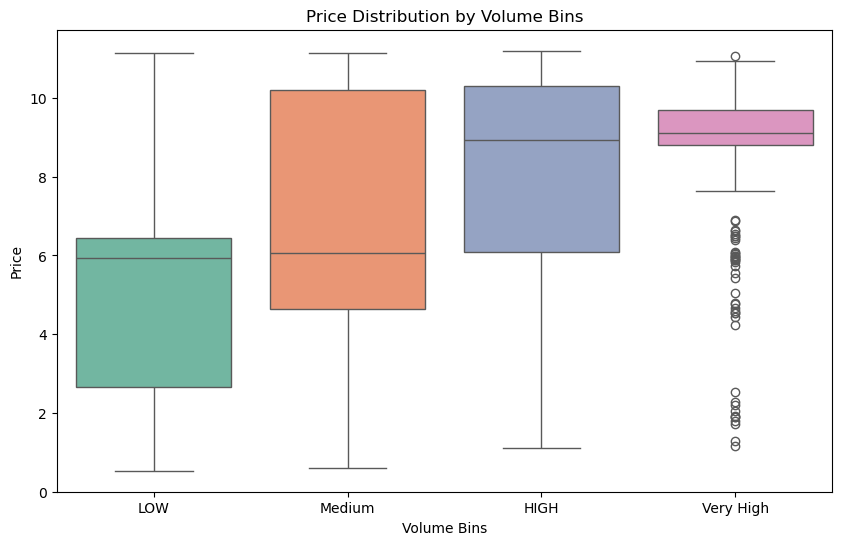

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Volume_bins',y='Log_Price',data=data,palette='Set2')
plt.title('Price Distribution by Volume Bins')
plt.xlabel('Volume Bins')
plt.ylabel('Price')
plt.show()

In [67]:
#How often does the Open price predict the High or Low of the day?

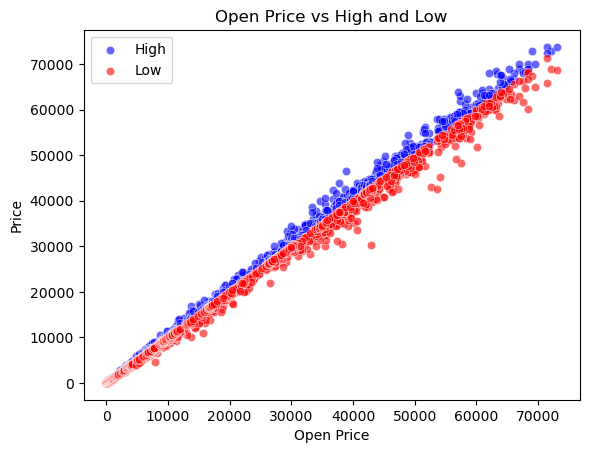

In [68]:
sns.scatterplot(data=data, x='Open', y='High', label='High', color='blue', alpha=0.6)
sns.scatterplot(data=data, x='Open', y='Low', label='Low', color='red', alpha=0.6)
plt.title('Open Price vs High and Low')
plt.xlabel('Open Price')
plt.ylabel('Price')
plt.legend()
plt.show()


In [69]:
correlation2= data[['Open','High']].corr()
print(correlation2)
correlation3=data[['Open','Low']].corr()
print(correlation3)

          Open      High
Open  1.000000  0.999569
High  0.999569  1.000000
          Open       Low
Open  1.000000  0.999266
Low   0.999266  1.000000


In [70]:
# Determining the threshold for even more accurate analysis

In [71]:
data['High_Diff_Percent'] = abs(data['High'] - data['Open']) / data['Open'] * 100
data['Low_Diff_Percent'] = abs(data['Open'] - data['Low']) / data['Open'] * 100


In [72]:
high_threshold = data['High_Diff_Percent'].quantile(0.90)
low_threshold = data['Low_Diff_Percent'].quantile(0.90)

print(f"High Threshold: {high_threshold:.2f}%")
print(f"Low Threshold: {low_threshold:.2f}%")


High Threshold: 7.14%
Low Threshold: 7.13%


In [73]:
data['High_Match'] = data['High_Diff_Percent'] <= high_threshold
data['Low_Match'] = data['Low_Diff_Percent'] <= low_threshold


Correlation between Open and High (within threshold): 1.00
Correlation between Open and Low (within threshold): 1.00


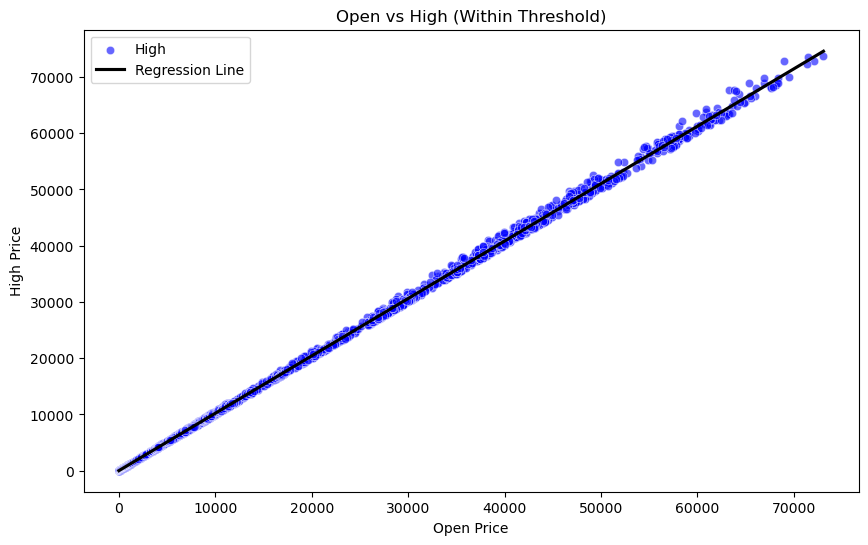

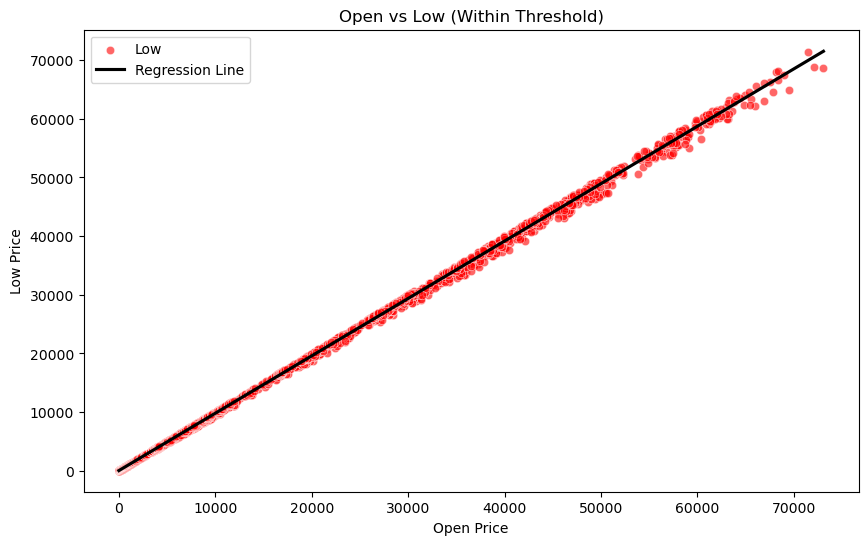

In [74]:
# Filter the data
high_match_data = data[data['High_Match']]
low_match_data = data[data['Low_Match']]
# Correlation for High and Open
high_correlation = high_match_data[['Open', 'High']].corr().iloc[0, 1]
print(f"Correlation between Open and High (within threshold): {high_correlation:.2f}")

# Correlation for Low and Open
low_correlation = low_match_data[['Open', 'Low']].corr().iloc[0, 1]
print(f"Correlation between Open and Low (within threshold): {low_correlation:.2f}")
import matplotlib.pyplot as plt
import seaborn as sns

# High Match Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=high_match_data, x='Open', y='High', color='blue', alpha=0.6, label='High')
sns.regplot(data=high_match_data, x='Open', y='High', scatter=False, color='black', label='Regression Line')
plt.title('Open vs High (Within Threshold)')
plt.xlabel('Open Price')
plt.ylabel('High Price')
plt.legend()
plt.show()

# Low Match Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=low_match_data, x='Open', y='Low', color='red', alpha=0.6, label='Low')
sns.regplot(data=low_match_data, x='Open', y='Low', scatter=False, color='black', label='Regression Line')
plt.title('Open vs Low (Within Threshold)')
plt.xlabel('Open Price')
plt.ylabel('Low Price')
plt.legend()
plt.show()


In [75]:
#Can the difference between Open and Price (closing price) be predicted using historical data?

In [76]:
data['Open-ClosePrice']=data['Open']-data['Price']

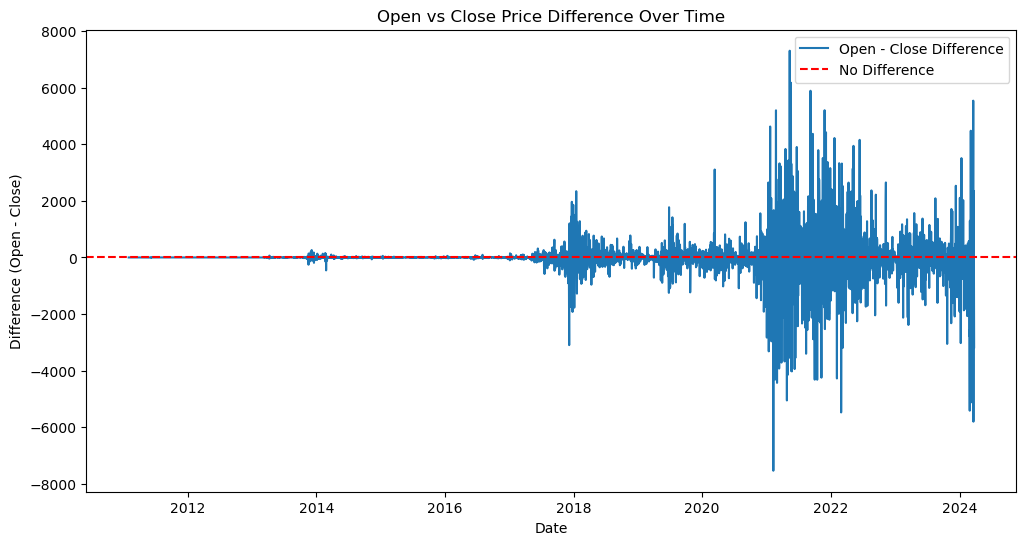

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Open-ClosePrice'], label='Open - Close Difference')
plt.axhline(y=0, color='red', linestyle='--', label='No Difference')
plt.title('Open vs Close Price Difference Over Time')
plt.xlabel('Date')
plt.ylabel('Difference (Open - Close)')
plt.legend()
plt.show()


In [78]:
#High and Low Price Movements:
#How often does the High price exceed the previous day’s Price by more than a certain percentage?

In [79]:
data['Prev_Close'] = data['Price'].shift(1)
data['High_Pct_Change'] = ((data['High'] - data['Prev_Close']) / data['Prev_Close']) * 100


In [80]:
threshold = 5 # Example: 5% threshold
data['High_Exceeds_Threshold'] = data['High_Pct_Change'] > threshold


In [81]:
exceed_count = data['High_Exceeds_Threshold'].sum()
total_days = len(data)
percentage_exceed = (exceed_count / total_days) * 100
print(f"Percentage of days High Price exceeds the previous day's Close by more than {threshold}%: {percentage_exceed:.2f}%")


Percentage of days High Price exceeds the previous day's Close by more than 5%: 16.81%


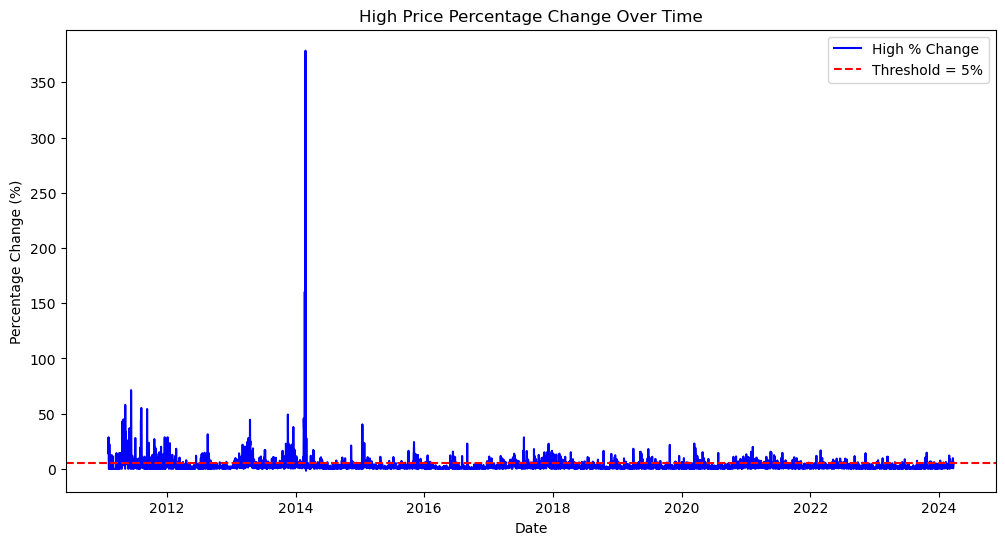

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['High_Pct_Change'], label='High % Change', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}%')
plt.title("High Price Percentage Change Over Time")
plt.xlabel("Date")
plt.ylabel("Percentage Change (%)")
plt.legend()
plt.show()


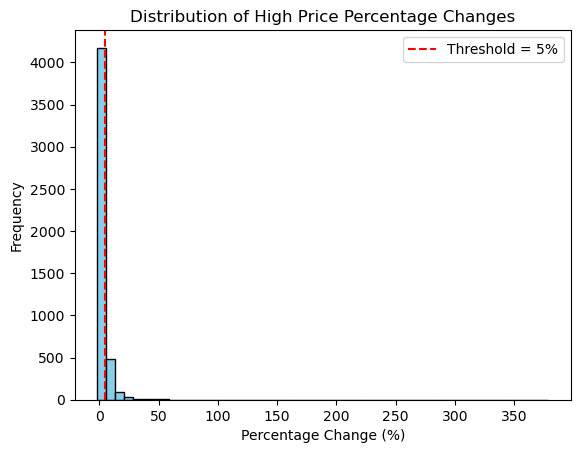

In [83]:
plt.hist(data['High_Pct_Change'], bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}%')
plt.title("Distribution of High Price Percentage Changes")
plt.xlabel("Percentage Change (%)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [84]:
# Create a column for positive Change %
data['Positive_Change'] = data['Change %'] > 0

# Identify consecutive positive days
data['Consecutive_Positive'] = (data['Positive_Change'] != data['Positive_Change'].shift()).cumsum()
consecutive_counts = data[data['Positive_Change']].groupby('Consecutive_Positive').size()
data['Consecutive_Positive_Days'] = data['Consecutive_Positive'].map(consecutive_counts).fillna(0)

# Resample data weekly and calculate mean Price Change % and consecutive days
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
weekly_data = data.resample('W').agg({'Price': 'mean', 'Consecutive_Positive_Days': 'max'})
weekly_data['Weekly_Change'] = weekly_data['Price'].pct_change() * 100


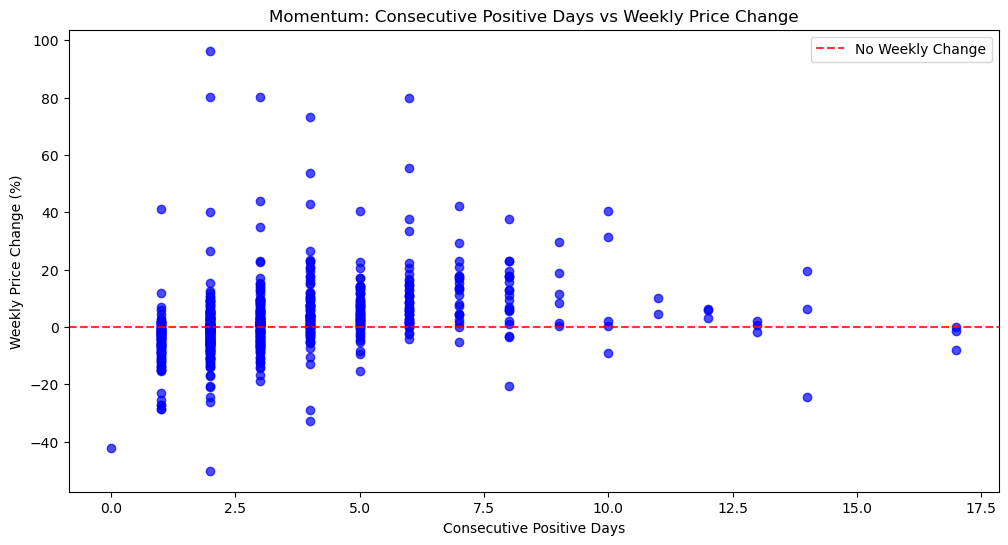

In [85]:
import matplotlib.pyplot as plt

# Plot Weekly Change vs Consecutive Positive Days
plt.figure(figsize=(12, 6))
plt.scatter(weekly_data['Consecutive_Positive_Days'], weekly_data['Weekly_Change'], alpha=0.7, color='blue')
plt.title("Momentum: Consecutive Positive Days vs Weekly Price Change")
plt.xlabel("Consecutive Positive Days")
plt.ylabel("Weekly Price Change (%)")
plt.axhline(0, color='red', linestyle='--', alpha=0.8, label="No Weekly Change")
plt.legend()
plt.show()


In [86]:
# Extract month from the Date
data['Month'] = data.index.month

# Calculate average Price and Volume for each month
monthly_stats = data.groupby('Month').agg({'Price': 'mean', 'Vol.': 'mean'}).reset_index()


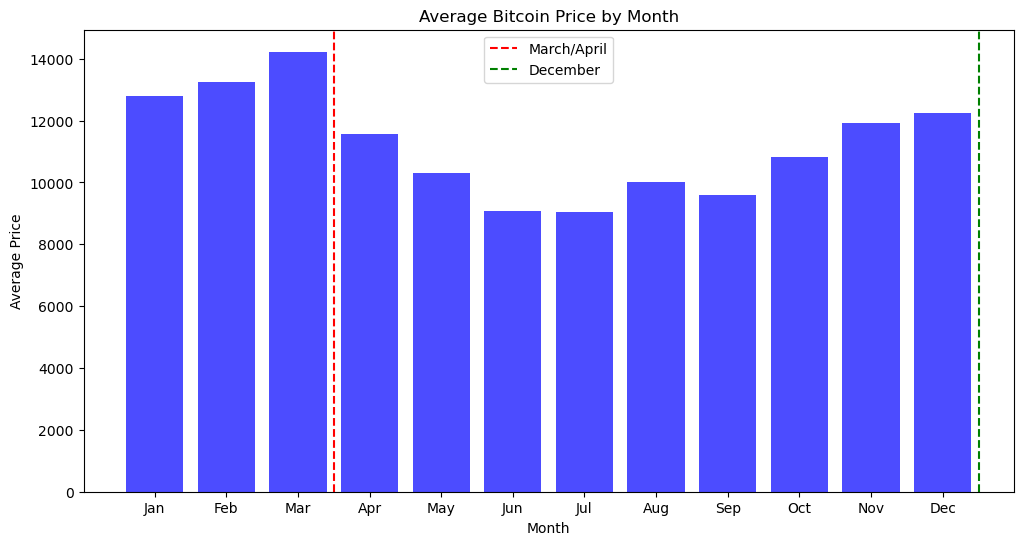

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(monthly_stats['Month'], monthly_stats['Price'], color='blue', alpha=0.7)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Average Bitcoin Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.axvline(x=3.5, color='red', linestyle='--', label='March/April')
plt.axvline(x=12.5, color='green', linestyle='--', label='December')
plt.legend()
plt.show()


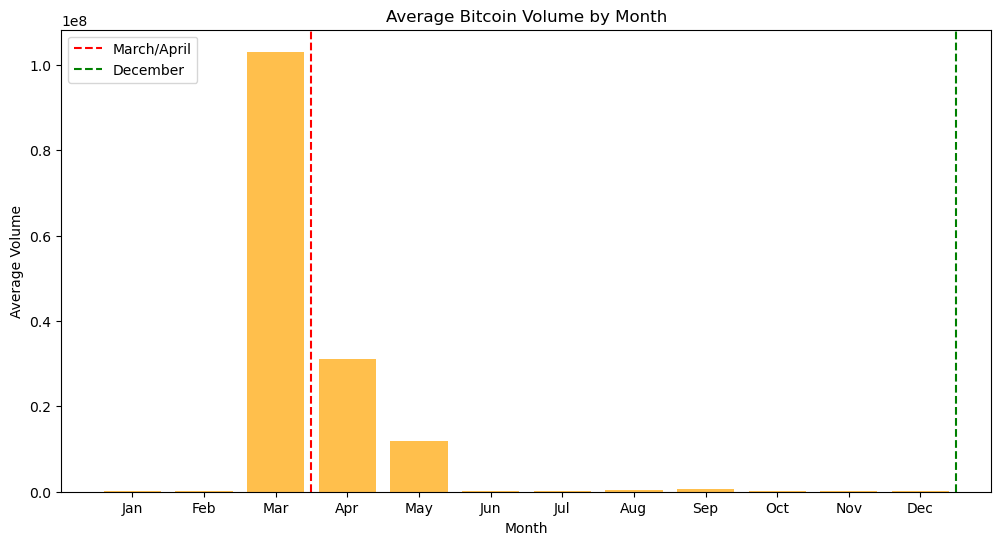

In [88]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_stats['Month'], monthly_stats['Vol.'], color='orange', alpha=0.7)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Average Bitcoin Volume by Month')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.axvline(x=3.5, color='red', linestyle='--', label='March/April')
plt.axvline(x=12.5, color='green', linestyle='--', label='December')
plt.legend()
plt.show()


In [89]:
# Extract Year and Month
data['Year'] = data.index.year
data['Month'] = data.index.month

# Group by Year and Month to calculate average Price
heatmap_data = data.pivot_table(index='Year', columns='Month', values='Price', aggfunc='mean')

# Calculate yearly average Price
yearly_avg_price = data.groupby('Year')['Price'].mean().reset_index()



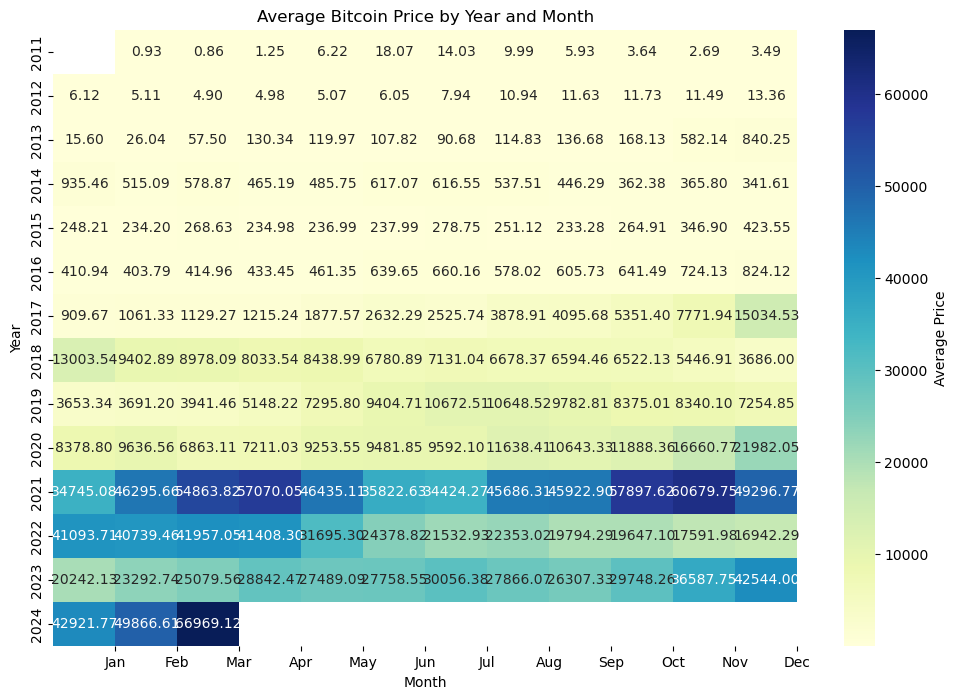

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Average Price'})
plt.title('Average Bitcoin Price by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


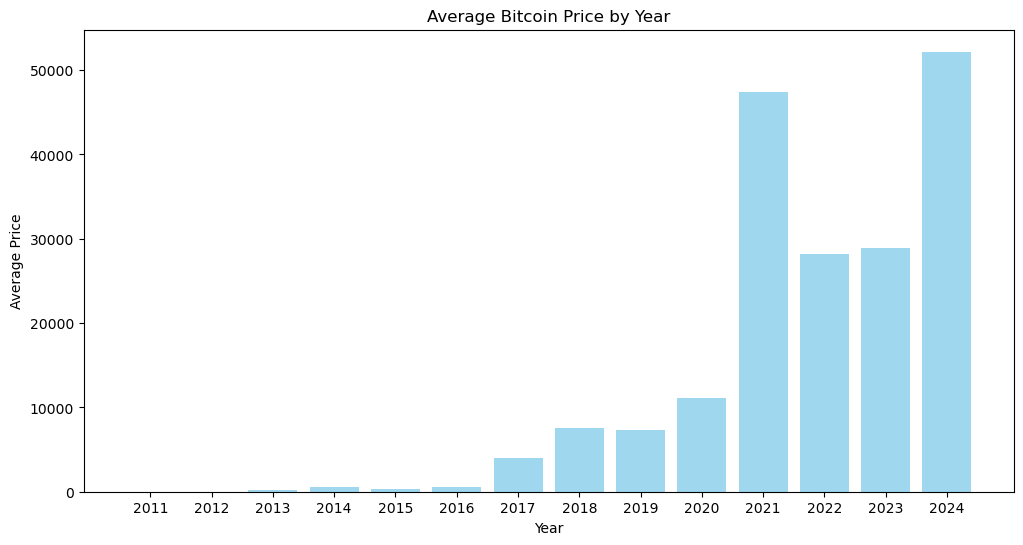

In [91]:
plt.figure(figsize=(12, 6))
plt.bar(yearly_avg_price['Year'], yearly_avg_price['Price'], color='skyblue', alpha=0.8)
plt.title('Average Bitcoin Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(yearly_avg_price['Year'])
plt.show()


In [93]:
!pip install tensorflow


C:\Users\sindhu\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 8.2482e-04 - val_loss: 0.0013
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - loss: 5.6593e-04 - val_loss: 0.0012
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 5.0320e-04 - val_loss: 0.0012
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - loss: 5.5953e-04 - val_loss: 0.0036
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 5.7160e-04 - val_loss: 8.5883e-04
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - loss: 4.8388e-04 - val_loss: 0.0030
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 6.1208e-04 - val_loss: 8.8021e-04
Epoch 9/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 4.0098e-04 - val_loss: 0.0010
Epoch 10/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 4.9955e-04 - val_loss: 6.7443e-04
Epoch 11/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 2.9193e-04 - 

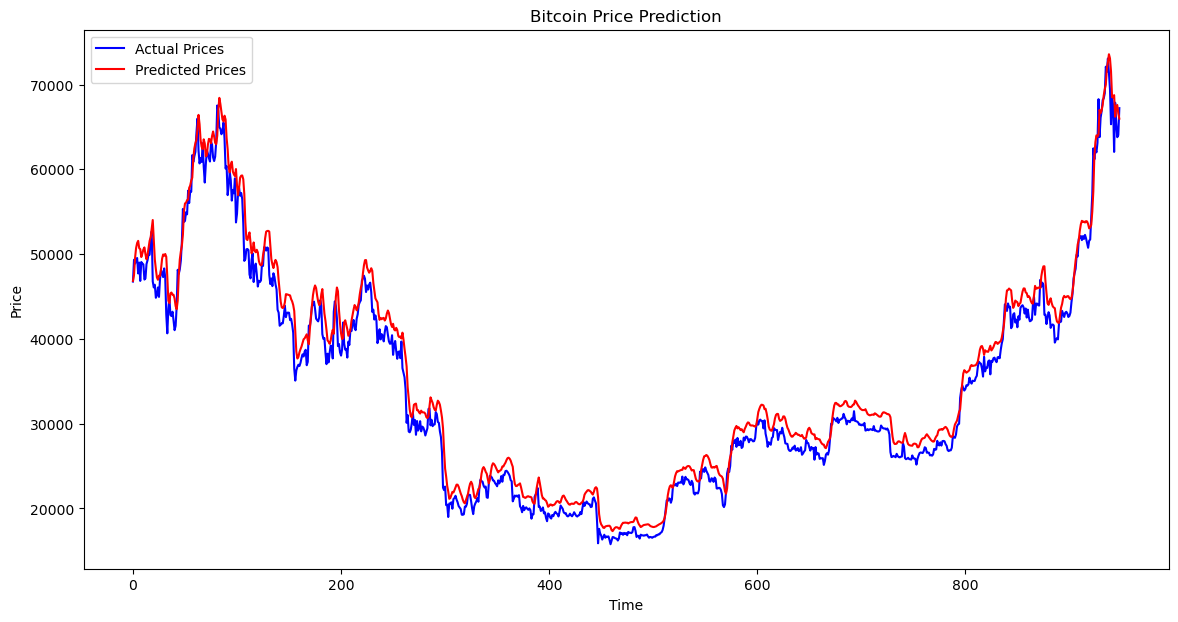

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Load dataset


# Preprocess data
data = data[['Price']]  # Use only the 'Price' column for simplicity
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare data for LSTM
def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

look_back = 60  # Use 60 days of historical data to predict the next day
X, y = create_dataset(scaled_data, look_back)

# Reshape input data to [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

# Predict
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label="Actual Prices", color='blue')
plt.plot(predicted_prices, label="Predicted Prices", color='red')
plt.title("Bitcoin Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Save the model
model.save("bitcoin_price_lstm_model.h5")


In [181]:
from sklearn.metrics import mean_absolute_percentage_error

# Predicted and actual prices (scaled back to the original scale)
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAPE
mape = mean_absolute_percentage_error(actual_prices, predicted_prices) * 100

# Calculate Accuracy
accuracy = 100 - mape

print(f"MAPE: {mape:.2f}%")
print(f"Accuracy: {accuracy:.2f}%")


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
MAPE: 5.86%
Accuracy: 94.14%
